In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
feature_names = boston.feature_names

In [6]:
X = pd.DataFrame(data,columns = feature_names)

In [7]:
price = boston.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

In [15]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [16]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [17]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [18]:
X_train_tsne.shape

(404, 2)

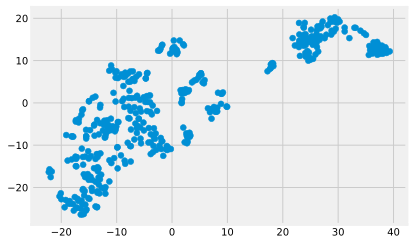

In [19]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

**Задача2**

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [22]:
X_train_tsne_clustered = model.fit_predict(X_train_tsne)

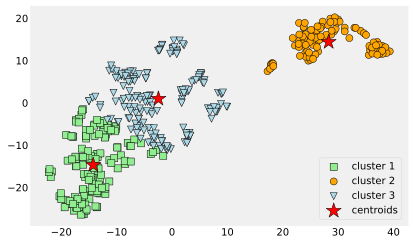

In [23]:
plt.scatter(
    X_train_tsne[X_train_tsne_clustered == 0, 0], X_train_tsne[X_train_tsne_clustered == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_train_tsne[X_train_tsne_clustered == 1, 0], X_train_tsne[X_train_tsne_clustered == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_train_tsne[X_train_tsne_clustered == 2, 0], X_train_tsne[X_train_tsne_clustered == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [25]:
y_train[X_train_tsne_clustered==0].mean()

26.564705882352943

In [26]:
y_train[X_train_tsne_clustered==1].mean()

16.277227722772277

In [27]:
y_train[X_train_tsne_clustered==2].mean()

23.67065868263473

In [28]:
X_train.loc[X_train_tsne_clustered==0, 'CRIM'].mean()

0.09462279411764707

In [29]:
X_train.loc[X_train_tsne_clustered==1, 'CRIM'].mean()

13.17982178217822

In [30]:
X_train.loc[X_train_tsne_clustered==2, 'CRIM'].mean()

0.6829679640718562

**Задача3**

In [32]:
X_train_clustered = model.fit_predict(X_train_scaled)

In [33]:
X_test_clustered = model.predict(X_test_scaled)

In [34]:
y_test[X_test_clustered==0].mean()

21.860784313725492

In [35]:
y_test[X_test_clustered==1].mean()

16.43714285714286

In [36]:
y_test[X_test_clustered==2].mean()

31.35

In [37]:
X_test.loc[X_test_clustered==0, 'CRIM'].mean()

0.2660788235294118

In [38]:
X_test.loc[X_test_clustered==1, 'CRIM'].mean()

10.165531142857143

In [39]:
X_test.loc[X_test_clustered==2, 'CRIM'].mean()

0.06206